In [1]:
# 二元分类效果的评估方法
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

%matplotlib inline

In [2]:
# 术语解释：
# 真阳性：true positives, TP True => True
# 真阴性：true negatives, TN False => False
# 假阳性：false positives, FP False => True
# 假阴性：false negatives, FN True => False

In [3]:
# 准确率：分类器预测正确性的比例，可以通过LogisticRegression.score() 来计算准确率。

In [4]:
# 精确率：预测为True的结果中正例的比例，P = TP / (TP + FP)

In [5]:
# 召回率（灵敏度）：所有正例True被正确找出来的比例，R = TP / (TP + FN)

In [6]:
# 综合评价指标：精确率和召回率都不能从差的分类器中区分出好的分类器，综合评价指标平衡了精确率和召回率。
# F=2 * PR / (P + R)

In [7]:
# ROC(Receiver Operating Characteristic)画的是分类器的召回率与误警率(fall-out)的曲线
# AUC(Area Under Curve)，ROC曲线下方的面积,它把ROC曲线变成一个值,表示分类器随机预测的效果。

[ 0.    0.    0.25  0.25  1.  ]
[ 0.5         0.83333333  0.83333333  1.          1.        ]
[ 0.9   0.75  0.3   0.2   0.1 ]
0.958333333333


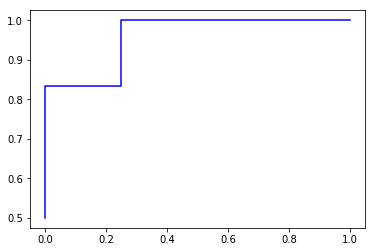

In [8]:
pred = [1, 1, 1, 0, 0, 0, 1, 0, 1, 1]
predictions = [0.9, 0.9, 0.2, 0.1, 0.1, 0.1, 0.8, 0.3, 0.75, 0.9]
false_positive_rate, recall, thresholds = roc_curve(pred, predictions)
print(false_positive_rate)
print(recall)
print(thresholds) # 不懂的话看下面的解释
roc_auc = auc(false_positive_rate, recall)
print(roc_auc)
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' % roc_auc) # X轴是假阳性，Y轴是召回率。

In [9]:
# 没看懂上面的很正常，下面开始具体讲解。
# Y轴为 TPR 真正例率，预测为正且实际为正的样本占所有正例样本的比例。 TPR = TP / (TP + FN)
# 横轴为 FPR 假正例率，预测为正但实际为负的样本占所有负例样本的比例。FPR = FP / (TN + FP)
# 先YY一下直角四个角上的点：
# (0, 0)：分类器将所有的样本都预测为负样本
# (0, 1)：这意味着分类器很完美，因为它将所有的样本都正确分类。（所以曲线越接近左上角越好）
# (1, 0)：这个分类器是最糟糕的，因为它成功避开了所有的正确答案。
# (1, 1)：分类器将所有的样本都预测为正样本。

In [10]:
# 如何画ROC曲线，先来20个值（按Score从小到大排列）：
#  如果阈值设置为0或1，正好对应图上(0, 0)和(1, 1)两个点
# ID    Class    Score    阈值0.52    阈值0.9
# 1     F        0.1      F           F
# 2     T        0.3      F           F
# 3     F        0.33     F           F
# 4     T        0.34     F           F
# 5     F        0.35     F           F
# 6     F        0.36     F           F
# 7     F        0.37     F           F
# 8     T        0.38     F           F
# 9     F        0.39     F           F
# 10    T        0.4      F           F
# 11    F        0.505    F           F
# 12    T        0.51     F           F
# 13    F        0.52     T           F
# 14    F        0.53     T           F
# 15    T        0.54     T           F
# 16    T        0.55     T           F
# 17    T        0.6      T           F
# 18    F        0.7      T           F
# 19    T        0.8      T           F
# 20    T        0.9      T           T
# 阈值0.52：FPR(X) = 0.3, TPR(Y) = 0.5
# 阈值0.9：FPR(X) = 0, TPR(Y) = 0.1

In [11]:
# AUC就简单了，根据上面取不同的阈值然后计算X和Y，最后计算面积。简单说面积越大分类器性能越好。